## Data Preparation:

### Load and visualise the data

In [6]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt

# Load the MNIST dataset from the provided CSV file
train_data = pd.read_csv("./digit-recognizer/train.csv")
print('train_data (rows, columns): ', train_data.shape)

# Separate the labels (target) and the pixel values
labels = train_data['label']
pixels = train_data.drop('label', axis=1)

train_data (rows, columns):  (42000, 785)


#### Afficher une image quelconque depuis le train en indiquant comme titre de l'image son label (càd le target associé)

In [33]:
def getRandomImg(min, max):
    # Get a random image from the dataset
    random_label = random.randint(min, max)
    random_img = pixels[labels == random_label].iloc[0].values.reshape(28, 28) # 28x28 pixels
    return random_img, random_label

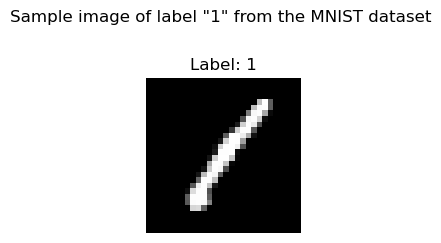

In [37]:
plt.figure(figsize=(2, 3))
img, imageLabel = getRandomImg(0, 9)
title = f'Sample image of label "{imageLabel}" from the MNIST dataset'
plt.imshow(img, cmap='gray')
plt.title(f"Label: {imageLabel}")
plt.axis('off')
plt.suptitle(title)
plt.show()

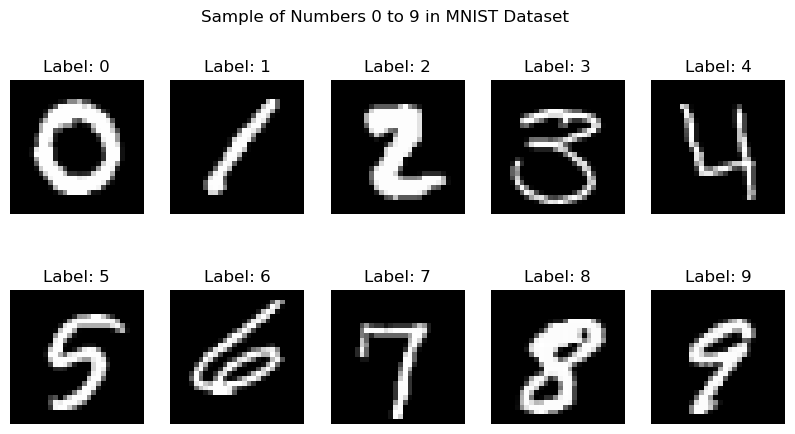

In [8]:
# Define a function to display images and labels
def show_mnist_images(images, labels, title):
    plt.figure(figsize=(10, 5))
    for i in range(10):
        plt.subplot(2, 5, i + 1)
        img = images[labels == i].iloc[0].values.reshape(28, 28) # 28x28 pixels
        plt.imshow(img, cmap='gray')
        plt.title(f"Label: {i}")
        plt.axis('off')
    plt.suptitle(title)
    plt.show()

# Show a sample of numbers 0 to 9
show_mnist_images(pixels, labels, "Sample of Numbers 0 to 9 in MNIST Dataset")

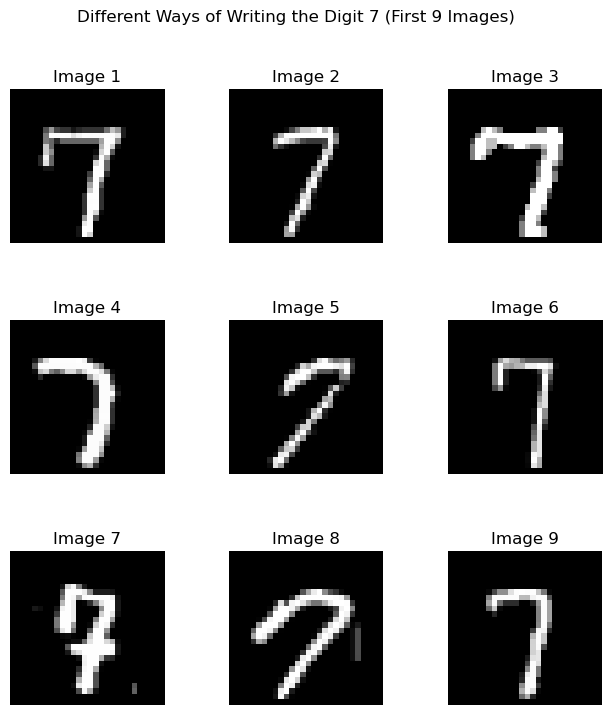

In [9]:
# Function to display the first 9 images of digit 7
def show_sevens(images, labels):
    fig, axes = plt.subplots(3, 3, figsize=(8, 8))
    fig.subplots_adjust(hspace=0.5)
    sevens = images[labels == 7].values
    
    for i, ax in enumerate(axes.flat):
        img = sevens[i].reshape(28, 28)
        ax.imshow(img, cmap='gray')
        ax.set_title(f"Image {i + 1}")
        ax.axis('off')

    plt.suptitle("Different Ways of Writing the Digit 7 (First 9 Images)")
    plt.show()

# Display the first 9 images of digit 7
show_sevens(pixels, labels)

### Afficher le représentant "moyen" de chaque chiffre

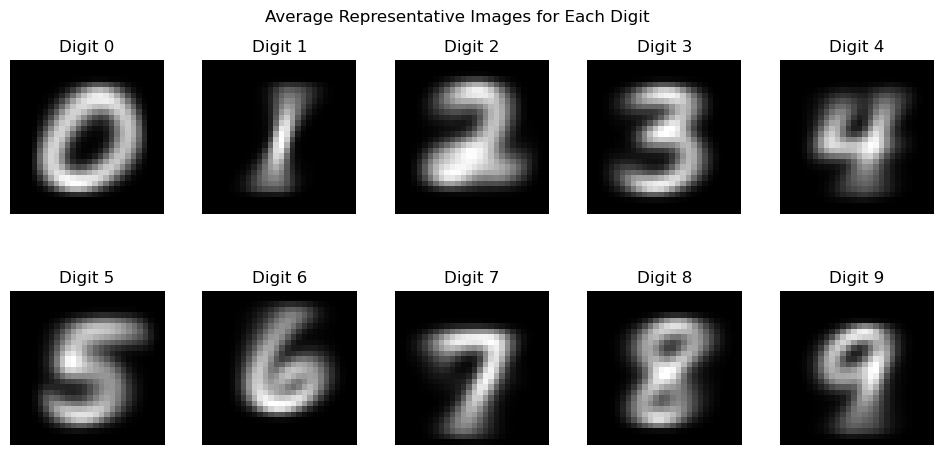

In [17]:
# Function to display the average representative image for each digit
def show_average_representatives(images, labels):
    fig, axes = plt.subplots(2, 5, figsize=(12, 5))
    fig.subplots_adjust(hspace=0.5)
    
    for i, ax in enumerate(axes.flat):
        digit_images = images[labels == i].values
        average_image = np.mean(digit_images, axis=0).reshape(28, 28)
        ax.imshow(average_image, cmap='gray')
        ax.set_title(f"Digit {i}")
        ax.axis('off')

    plt.suptitle("Average Representative Images for Each Digit")
    plt.show()

# Display the average representative image for each digit (0 to 9)
show_average_representatives(pixels, labels)

### Model Selection and Experimentation:

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(pixels, labels, test_size=0.2, random_state=42)

k=1

# Initialize the KNN classifier
knn = KNeighborsClassifier(n_neighbors=k)

# Train the KNN classifier on the training data
knn.fit(X_train, y_train)

# Make predictions on the test data
y_pred = knn.predict(X_test)

# Calculate the accuracy of the KNN model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of KNN: {accuracy * 100:.2f}%")


Accuracy of KNN: 96.87%


## Searching for optimal 'k'

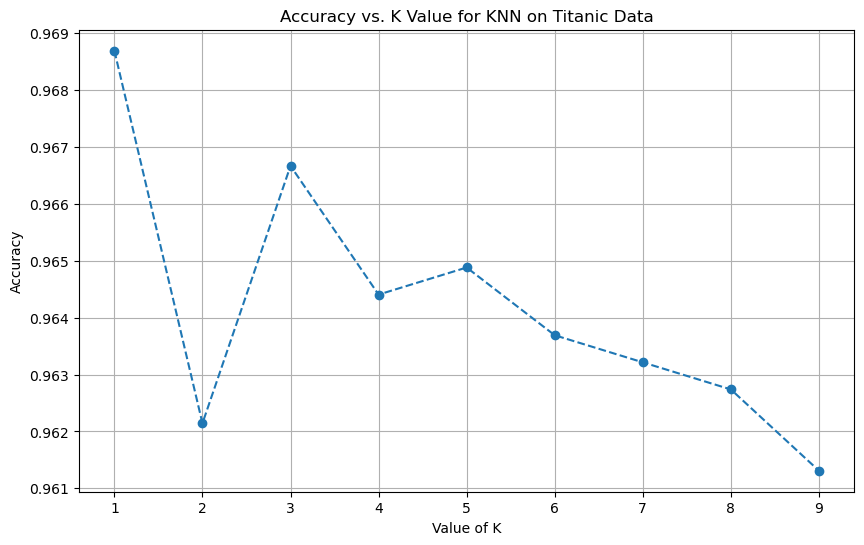

(1, 0.9686904761904762)

In [42]:
# Initialize variables to store results
k_values = range(1, 10)
accuracies = []

# Loop over various k values and record accuracy
for k in k_values:
    knn_temp = KNeighborsClassifier(n_neighbors=k)
    knn_temp.fit(X_train, y_train)
    y_pred_temp = knn_temp.predict(X_test)
    accuracy_temp = accuracy_score(y_test, y_pred_temp)
    accuracies.append(accuracy_temp)

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracies, marker='o', linestyle='dashed')
plt.xlabel('Value of K')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. K Value for KNN on Titanic Data')
plt.xticks(k_values)
plt.grid(True)
plt.show()

# Displaying the k value that resulted in the highest accuracy
best_k = k_values[accuracies.index(max(accuracies))]
best_accuracy = max(accuracies)
best_k, best_accuracy

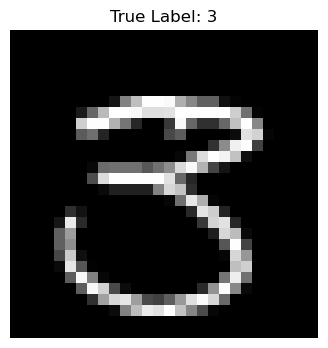

/Users/assane/anaconda3/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


Predicted Label: 3


In [40]:
# Generate a random image and label using my function
random_image, true_label = getRandomImg(0, 9)

# Display the random image
plt.figure(figsize=(4, 4))
plt.imshow(random_image, cmap='gray')
plt.title(f"True Label: {true_label}")
plt.axis('off')
plt.show()

# Reshape the image for prediction (KNN expects a 1D array)
random_image_flat = random_image.reshape(1, -1)

# Use the KNN model to predict the label
predicted_label = knn.predict(random_image_flat)

print(f"Predicted Label: {predicted_label[0]}")